# CS109b Final Project: Milestone 1
---
Group 6: Chris Chen, Phillip Huang, Harry Xue, Ted Zhu

In [20]:
# import modules
import requests
import shutil
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# allow multiple outs per cell in Jupyter Notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## API code to access the genre and movie poster path of your favorite movie
One of my favorite movies is `The Departed`. Let's access the information for it via the TMDB API.

Following the instructions at https://developers.themoviedb.org/3/getting-started, this is pretty straightforward.

### Accessing the genre of The Departed

In [21]:
# API Key (Harry's)
payload = {
            'api_key': '5eef6423b6f7cea2f5b6cae0838e38f9',
            'query': 'The Departed' 
         }

r = requests.get('https://api.themoviedb.org/3/search/movie', params = payload).json()
r

{u'page': 1,
 u'results': [{u'adult': False,
   u'backdrop_path': u'/8Od5zV7Q7zNOX0y9tyNgpTmoiGA.jpg',
   u'genre_ids': [18, 53, 80],
   u'id': 1422,
   u'original_language': u'en',
   u'original_title': u'The Departed',
   u'overview': u"To take down South Boston's Irish Mafia, the police send in one of their own to infiltrate the underworld, not realizing the syndicate has done likewise. While an undercover cop curries favor with the mob kingpin, a career criminal rises through the police ranks. But both sides soon discover there's a mole among them.",
   u'popularity': 4.587519,
   u'poster_path': u'/tGLO9zw5ZtCeyyEWgbYGgsFxC6i.jpg',
   u'release_date': u'2006-10-05',
   u'title': u'The Departed',
   u'video': False,
   u'vote_average': 7.8,
   u'vote_count': 3344},
  {u'adult': False,
   u'backdrop_path': None,
   u'genre_ids': [27, 18],
   u'id': 321724,
   u'original_language': u'ko',
   u'original_title': u'\u5996\u82b1\uc758 \u50b3\u8aaa',
   u'overview': u"A devoted son hears 

The first result is the one we want, so let's extract the movie's id in order to look up the genre of the film.

In [22]:
the_departed_id = r['results'][0]['id']
# Sanity check to see if we got the right one
the_departed_id

1422

In [23]:
# Now let's access the film's information by id in order to lookup the genre
r = requests.get('https://api.themoviedb.org/3/movie/' + str(the_departed_id) + '?api_key=5eef6423b6f7cea2f5b6cae0838e38f9').json()
genres_list = r['genres']

# Unpack the names of the genres
for genre in genres_list:
    print genre['name']

Drama
Thriller
Crime


### Accessing the poster for The Departed

In [24]:
poster_path = r['poster_path']
url = 'http://image.tmdb.org/t/p/w500/' + poster_path
Image(url=url)

## Genre for this movie listed by TMDb and IMDb

Let's compare the genres fetched from TMDb with those from IMDb.
http://www.imdb.com/title/tt0407887/

IMDb lists the genres:
Crime, Drama, Thriller

We have a match!

## A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API

In [40]:
popular_r = requests.get('https://api.themoviedb.org/3/discover/movie?' + 'api_key=5eef6423b6f7cea2f5b6cae0838e38f9' + '&primary_release_year=2016').json()

# Print names of most popular movies
print "Names of most popular films in 2016:"
titles = []
# Get list of ids for genre lookup
ids = []
for i, film in enumerate(popular_r['results'][:10]):
    titles.append(film['original_title'])
    ids.append(film['id'])
    print i+1, film['original_title']

print "\n"

# Create dictionary of {title: genre list} entries
# i.e. {'The Departed': ['Crime','Drama',...]...} 
genres_by_movie = {title: [] for title in titles}

# Look up genres for each of the films
for i, id in enumerate(ids):
    print "Genres for", titles[i], ':' 
    
    # Now let's access the film's information by id in order to lookup the genre
    r = requests.get('https://api.themoviedb.org/3/movie/' + str(id) + '?api_key=5eef6423b6f7cea2f5b6cae0838e38f9').json()
    genres_list = r['genres']

    # Unpack the names of the genres
    for genre in genres_list:
        # Eliminate spaces between words in genre name
        genres_by_movie[titles[i]].append(genre['name'].replace(" ", "")) 
        print genre['name']
    
    print "\n"

Names of most popular films in 2016:
1 Sing
2 Fantastic Beasts and Where to Find Them
3 Finding Dory
4 Deadpool
5 Rogue One: A Star Wars Story
6 Doctor Strange
7 Arrival
8 Captain America: Civil War
9 Underworld: Blood Wars
10 Lion


Genres for Sing :
Animation
Comedy
Drama
Family
Music


Genres for Fantastic Beasts and Where to Find Them :
Adventure
Action
Fantasy


Genres for Finding Dory :
Adventure
Animation
Comedy
Family


Genres for Deadpool :
Action
Adventure
Comedy
Romance


Genres for Rogue One: A Star Wars Story :
Action
Drama
Science Fiction
War


Genres for Doctor Strange :
Action
Adventure
Fantasy
Science Fiction


Genres for Arrival :
Drama
Science Fiction


Genres for Captain America: Civil War :
Action
Science Fiction


Genres for Underworld: Blood Wars :
Action
Horror


Genres for Lion :
Drama




## Visualization of Movie Genre Pairs
We can create a cooccurence matrix of genres across the top 10 movies from 2016, and then visualize via heatmap.

Inspiration from: http://stackoverflow.com/questions/35562789/word-word-co-occurrence-matrix

In [41]:
# Get genre lists into right format for CountVectorizer
docs = [" ".join(genre_list) for genre_list in genres_by_movie.values()]

count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model
X = count_model.fit_transform(docs)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
print(Xc.todense()) # print out matrix in dense format

[[0 3 0 1 1 0 2 1 0 1 3 1]
 [3 0 1 2 0 1 2 0 0 1 1 0]
 [0 1 0 2 1 2 0 0 1 0 0 0]
 [1 2 2 0 1 2 0 0 1 1 0 0]
 [1 0 1 1 0 1 0 0 1 0 2 1]
 [0 1 2 2 1 0 0 0 1 0 0 0]
 [2 2 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0]
 [3 1 0 0 2 0 1 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0 1 0]]


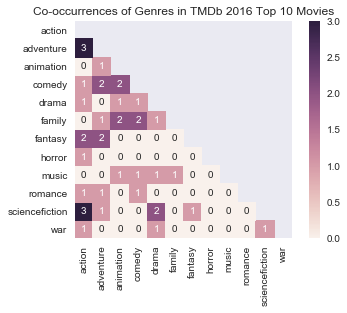

In [42]:
df = DataFrame(Xc.todense(), index=count_model.get_feature_names(), columns=count_model.get_feature_names())

ax = plt.axes()

# Apply mask to only plot half of matrix
mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(df, mask=mask, annot=True, fmt="d", square=True)

ax.set_title('Co-occurrences of Genres in TMDb 2016 Top 10 Movies')

This looks a bit sparse, let's expand it to the rest of the pulled data, which totals 20 in length.

[[0 6 0 1 1 0 5 0 1 0 1 5 1]
 [6 0 2 3 2 2 6 0 0 0 2 4 0]
 [0 2 0 3 1 3 0 0 0 1 0 0 0]
 [1 3 3 0 1 3 0 0 0 1 1 0 0]
 [1 2 1 1 0 1 1 2 0 1 1 3 2]
 [0 2 3 3 1 0 0 0 0 1 0 0 0]
 [5 6 0 0 1 0 0 0 0 0 0 3 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 0 0 0]
 [1 2 0 1 1 0 0 0 0 0 0 1 0]
 [5 4 0 0 3 0 3 0 0 0 1 0 1]
 [1 0 0 0 2 0 0 1 0 0 0 1 0]]


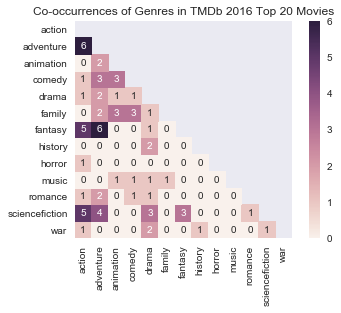

In [44]:
#
# Repeat above steps with the entire set
#

titles_full = []
ids_full = []
for film in popular_r['results']:
    titles_full.append(film['original_title'])
    ids_full.append(film['id'])

# Create dictionary of {title: genre list} entries
# i.e. {'The Departed': ['Crime','Drama',...]...} 
genres_by_movie_full = {title: [] for title in titles_full}

# Look up genres for each of the films
for i, id in enumerate(ids_full):
    
    # Now let's access the film's information by id in order to lookup the genre
    r = requests.get('https://api.themoviedb.org/3/movie/' + str(id) + '?api_key=5eef6423b6f7cea2f5b6cae0838e38f9').json()
    genres_list = r['genres']

    # Unpack the names of the genres
    for genre in genres_list:
        # Eliminate spaces between words in genre name
        genres_by_movie_full[titles_full[i]].append(genre['name'].replace(" ", "")) 
        
# Get genre lists into right format for CountVectorizer
docs = [" ".join(genre_list) for genre_list in genres_by_movie_full.values()]

count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model
X = count_model.fit_transform(docs)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
print(Xc.todense()) # print out matrix in dense format

df = DataFrame(Xc.todense(), index=count_model.get_feature_names(), columns=count_model.get_feature_names())

ax = plt.axes()

# Apply mask to only plot half of matrix
mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(df, mask=mask, annot=True, fmt="d", square=True)

ax.set_title('Co-occurrences of Genres in TMDb 2016 Top 20 Movies')